### Activity 5
### 63010026 กฤตศยา นทีมณฑล
### 63010339 ณัฐวดี ติณภูมิ

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn import model_selection
import pandas_datareader.data as web

In [2]:
stk_tickers = ['MSFT', 'IBM', 'GOOGL']
ccy_tickers = ['DEXJPUS', 'DEXUSUK']
idx_tickers = ['SP500', 'DJIA', 'VIXCLS']
stk_data = web.DataReader(stk_tickers, 'yahoo')
ccy_data = web.DataReader(ccy_tickers, 'fred')
idx_data = web.DataReader(idx_tickers, 'fred')

In [3]:
stk_data

Attributes   Adj Close                               Close              \
Symbols           MSFT         IBM       GOOGL        MSFT         IBM   
Date                                                                     
2017-09-25   68.838745  109.942192   46.714001   73.260002  139.455063   
2017-09-26   68.838745  110.462242   46.871498   73.260002  140.114716   
2017-09-27   69.393120  109.783890   47.994999   73.849998  139.254303   
2017-09-28   69.411926  109.783890   48.240501   73.870003  139.254303   
2017-09-29   69.994514  109.346748   48.686001   74.489998  138.699814   
...                ...         ...         ...         ...         ...   
2022-09-16  244.740005  127.269997  102.800003  244.740005  127.269997   
2022-09-19  244.520004  127.730003  103.070000  244.520004  127.730003   
2022-09-20  242.449997  126.300003  101.139999  242.449997  126.300003   
2022-09-21  238.949997  124.930000   99.279999  238.949997  124.930000   
2022-09-22  240.979996  125.309998  100.139999  240.979996  125.309998   

Attributes                    High                                 Low  \
Symbols          GOOGL        MSFT         IBM       GOOGL        MSFT   
Date                                                                     
2017-09-25   46.714001   74.250000  139.608032   46.987499   72.919998   
2017-09-26   46.871498   73.809998  140.936905   47.203999   72.989998   
2017-09-27   47.994999   74.169998  140.439774   48.271500   73.169998   
2017-09-28   48.240501   73.970001  139.445511   48.308998   73.309998   
2017-09-29   48.686001   74.540001  139.282990   48.790501   73.879997   
...                ...         ...         ...         ...         ...   
2022-09-16  102.800003  245.300003  127.529999  103.129997  242.059998   
2022-09-19  103.070000  245.139999  128.059998  103.330002  240.850006   
2022-09-20  101.139999  243.509995  126.989998  102.370003  239.639999   
2022-09-21   99.279999  247.660004  127.839996  102.879997  238.899994   
2022-09-22  100.139999  243.860001  126.510002  101.239998  237.570007   

Attributes                                Open                          \
Symbols            IBM       GOOGL        MSFT         IBM       GOOGL   
Date                                                                     
2017-09-25  138.537292   46.225498   74.089996  138.738052   46.972500   
2017-09-26  139.521988   46.756001   73.669998  139.923523   46.834499   
2017-09-27  138.652008   47.097500   73.550003  140.229446   47.137001   
2017-09-28  137.868073   47.777500   73.540001  139.254303   47.812500   
2017-09-29  138.546844   48.299999   73.940002  139.053543   48.299999   
...                ...         ...         ...         ...         ...   
2022-09-16  123.830002  100.940002  244.259995  124.360001  102.070000   
2022-09-19  126.279999  101.550003  242.470001  126.489998  101.750000   
2022-09-20  125.519997  100.519997  242.070007  126.900002  102.080002   
2022-09-21  124.919998   99.269997  244.270004  126.889999  101.669998   
2022-09-22  124.410004   98.790001  237.869995  124.760002   98.820000   

Attributes      Volume                         
Symbols           MSFT        IBM       GOOGL  
Date                                           
2017-09-25  24149200.0  5452903.0  37468000.0  
2017-09-26  18019600.0  4695076.0  33454000.0  
2017-09-27  19565100.0  3663824.0  46692000.0  
2017-09-28  10883800.0  2902441.0  28018000.0  
2017-09-29  17079100.0  2776816.0  40622000.0  
...                ...        ...         ...  
2022-09-16  39775100.0  9838600.0  42780300.0  
2022-09-19  26826900.0  3981600.0  23036800.0  
2022-09-20  26660300.0  2837500.0  26517100.0  
2022-09-21  28625600.0  3389500.0  31487300.0  
2022-09-22  31036200.0  4046600.0  34273700.0  

[1258 rows x 18 columns]

In [4]:
ccy_data

,DEXJPUS,DEXUSUK
DATE,,
2017-09-25,111.64,1.3457
2017-09-26,112.16,1.3422
2017-09-27,112.76,1.3401
2017-09-28,112.66,1.3435
2017-09-29,112.64,1.3402
...,...,...
2022-09-12,142.41,1.1701
2022-09-13,144.30,1.1526
2022-09-14,142.93,1.1564


In [5]:
idx_data

,SP500,DJIA,VIXCLS
DATE,,,
2017-09-25,2496.66,22296.09,10.21
2017-09-26,2496.84,22284.32,10.17
2017-09-27,2507.04,22340.71,9.87
2017-09-28,2510.06,22381.20,9.55
2017-09-29,2519.36,22405.09,9.51
...,...,...,...
2022-09-16,3873.33,30822.42,26.30
2022-09-19,3899.89,31019.68,25.76
2022-09-20,3855.93,30706.23,27.16


## Get Data

### Select Columns

In [6]:
base = stk_data.loc[:, ('Adj Close', 'MSFT')]
X1 = stk_data.loc[:, ('Adj Close', ('GOOGL', 'IBM'))]
X2 = ccy_data
X3 = idx_data

In [7]:
X1

Attributes   Adj Close            
Symbols          GOOGL         IBM
Date                              
2017-09-25   46.714001  109.942192
2017-09-26   46.871498  110.462242
2017-09-27   47.994999  109.783890
2017-09-28   48.240501  109.783890
2017-09-29   48.686001  109.346748
...                ...         ...
2022-09-16  102.800003  127.269997
2022-09-19  103.070000  127.730003
2022-09-20  101.139999  126.300003
2022-09-21   99.279999  124.930000
2022-09-22  100.139999  125.309998

[1258 rows x 2 columns]

In [8]:
X2

,DEXJPUS,DEXUSUK
DATE,,
2017-09-25,111.64,1.3457
2017-09-26,112.16,1.3422
2017-09-27,112.76,1.3401
2017-09-28,112.66,1.3435
2017-09-29,112.64,1.3402
...,...,...
2022-09-12,142.41,1.1701
2022-09-13,144.30,1.1526
2022-09-14,142.93,1.1564


In [9]:
X3

,SP500,DJIA,VIXCLS
DATE,,,
2017-09-25,2496.66,22296.09,10.21
2017-09-26,2496.84,22284.32,10.17
2017-09-27,2507.04,22340.71,9.87
2017-09-28,2510.06,22381.20,9.55
2017-09-29,2519.36,22405.09,9.51
...,...,...,...
2022-09-16,3873.33,30822.42,26.30
2022-09-19,3899.89,31019.68,25.76
2022-09-20,3855.93,30706.23,27.16


In [10]:
X1.describe()

Attributes    Adj Close             
Symbols           GOOGL          IBM
count       1258.000000  1258.000000
mean          83.327420   115.472707
std           31.585117    10.841204
min           46.714001    79.847000
25%           57.122874   109.069330
50%           69.238003   114.154495
75%          112.697622   124.163908
max          149.838501   141.102219

In [11]:
X2.describe()

,DEXJPUS,DEXUSUK
count,1242.000000,1242.00000
mean,111.860145,1.31101
std,7.691142,0.05883
min,102.520000,1.14190
25%,107.700000,1.27265
50%,109.810000,1.31080
75%,112.775000,1.35620
max,144.390000,1.43320


In [12]:
X3.describe()

,SP500,DJIA,VIXCLS
count,1258.000000,1258.000000,1261.000000
mean,3382.457353,28585.312663,20.502831
std,688.228156,4123.343797,8.684854
min,2237.400000,18591.930000,9.140000
25%,2793.855000,25316.750000,14.650000
50%,3120.320000,27124.010000,18.760000
75%,4019.357500,32650.240000,24.470000
max,4796.560000,36799.650000,82.690000


In [13]:
X1.fillna(0)
X2.fillna(0)
X3.fillna(0)

,SP500,DJIA,VIXCLS
DATE,,,
2017-09-25,2496.66,22296.09,10.21
2017-09-26,2496.84,22284.32,10.17
2017-09-27,2507.04,22340.71,9.87
2017-09-28,2510.06,22381.20,9.55
2017-09-29,2519.36,22405.09,9.51
...,...,...,...
2022-09-16,3873.33,30822.42,26.30
2022-09-19,3899.89,31019.68,25.76
2022-09-20,3855.93,30706.23,27.16


## Standardized Data

In [14]:
scaler = preprocessing.StandardScaler()
X1 = pd.DataFrame(scaler.fit_transform(X1.values),index = X1.index,columns=X1.columns)
X2 = pd.DataFrame(scaler.fit_transform(X2.values),index = X2.index,columns=X2.columns)
X3 = pd.DataFrame(scaler.fit_transform(X3.values),index = X3.index,columns=X3.columns)

In [15]:
X1

Attributes Adj Close          
Symbols        GOOGL       IBM
Date                          
2017-09-25 -1.159659 -0.510341
2017-09-26 -1.154671 -0.462352
2017-09-27 -1.119086 -0.524949
2017-09-28 -1.111310 -0.524949
2017-09-29 -1.097200 -0.565287
...              ...       ...
2022-09-16  0.616757  1.088623
2022-09-19  0.625308  1.131071
2022-09-20  0.564179  0.999114
2022-09-21  0.505267  0.872694
2022-09-22  0.532506  0.907759

[1258 rows x 2 columns]

In [16]:
X2

,DEXJPUS,DEXUSUK
DATE,,
2017-09-25,-0.028635,0.589904
2017-09-26,0.039003,0.530386
2017-09-27,0.117046,0.494676
2017-09-28,0.104039,0.552493
2017-09-29,0.101437,0.496376
...,...,...
2022-09-12,3.973683,-2.396190
2022-09-13,4.219519,-2.693779
2022-09-14,4.041321,-2.629160


In [17]:
X3

,SP500,DJIA,VIXCLS
DATE,,,
2017-09-25,-1.287581,-1.525879,-1.185618
2017-09-26,-1.287320,-1.528735,-1.190225
2017-09-27,-1.272493,-1.515053,-1.224782
2017-09-28,-1.268103,-1.505230,-1.261642
2017-09-29,-1.254585,-1.499434,-1.266250
...,...,...,...
2022-09-16,0.713525,0.542763,0.667768
2022-09-19,0.752132,0.590621,0.605566
2022-09-20,0.688232,0.514573,0.766830


### Calculate

In [18]:
return_period = 1
Y = base.shift(-return_period)
X4_3DT = base.diff(3*return_period).shift(-3*return_period)
X4_6DT = base.diff(6*return_period).shift(-6*return_period)
X4_12DT = base.diff(12*return_period).shift(-12*return_period)
X4 = pd.concat([X4_3DT, X4_6DT, X4_12DT], axis=1)
X4.columns = ['MSFT_3DT', 'MSFT_6DT', 'MSFT_12DT']
X4 = pd.DataFrame(scaler.fit_transform(X4.values), index = X4.index,columns=X4.columns)

In [19]:
Y

Date
2017-09-25     68.838745
2017-09-26     69.393120
2017-09-27     69.411926
2017-09-28     69.994514
2017-09-29     70.107262
                 ...    
2022-09-16    244.520004
2022-09-19    242.449997
2022-09-20    238.949997
2022-09-21    240.979996
2022-09-22           NaN
Name: (Adj Close, MSFT), Length: 1258, dtype: float64

In [20]:
X4

,MSFT_3DT,MSFT_6DT,MSFT_12DT
Date,,,
2017-09-25,0.028453,0.013731,0.114044
2017-09-26,0.130412,0.064801,0.174995
2017-09-27,0.053122,0.146750,0.155840
2017-09-28,-0.007724,0.147939,0.168030
2017-09-29,-0.038970,0.108745,0.108819
...,...,...,...
2022-09-16,-1.085179,NaN,NaN
2022-09-19,-0.691403,NaN,NaN
2022-09-20,NaN,NaN,NaN


### Forming Dataset

In [21]:
#X = เอา X มารวมกันทั้งหมด
#dataset = เอา X,Y มารวมกัน
X = pd.concat([X1,X2,X3,X4],axis=1)
dataset = pd.concat([Y,X],axis=1)

In [22]:
X

,"(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-09-25,-1.159659,-0.510341,-0.028635,0.589904,-1.287581,-1.525879,-1.185618,0.028453,0.013731,0.114044
2017-09-26,-1.154671,-0.462352,0.039003,0.530386,-1.287320,-1.528735,-1.190225,0.130412,0.064801,0.174995
2017-09-27,-1.119086,-0.524949,0.117046,0.494676,-1.272493,-1.515053,-1.224782,0.053122,0.146750,0.155840
2017-09-28,-1.111310,-0.524949,0.104039,0.552493,-1.268103,-1.505230,-1.261642,-0.007724,0.147939,0.168030
2017-09-29,-1.097200,-0.565287,0.101437,0.496376,-1.254585,-1.499434,-1.266250,-0.038970,0.108745,0.108819
...,...,...,...,...,...,...,...,...,...,...
2022-09-16,0.616757,1.088623,4.055628,-2.875734,0.713525,0.542763,0.667768,-1.085179,NaN,NaN
2022-09-19,0.625308,1.131071,NaN,NaN,0.752132,0.590621,0.605566,-0.691403,NaN,NaN
2022-09-20,0.564179,0.999114,NaN,NaN,0.688232,0.514573,0.766830,NaN,NaN,NaN
2022-09-21,0.505267,0.872694,NaN,NaN,0.592296,0.387817,0.862437,NaN,NaN,NaN


In [23]:
dataset

,"(Adj Close, MSFT)","(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-09-25,68.838745,-1.159659,-0.510341,-0.028635,0.589904,-1.287581,-1.525879,-1.185618,0.028453,0.013731,0.114044
2017-09-26,69.393120,-1.154671,-0.462352,0.039003,0.530386,-1.287320,-1.528735,-1.190225,0.130412,0.064801,0.174995
2017-09-27,69.411926,-1.119086,-0.524949,0.117046,0.494676,-1.272493,-1.515053,-1.224782,0.053122,0.146750,0.155840
2017-09-28,69.994514,-1.111310,-0.524949,0.104039,0.552493,-1.268103,-1.505230,-1.261642,-0.007724,0.147939,0.168030
2017-09-29,70.107262,-1.097200,-0.565287,0.101437,0.496376,-1.254585,-1.499434,-1.266250,-0.038970,0.108745,0.108819
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-16,244.520004,0.616757,1.088623,4.055628,-2.875734,0.713525,0.542763,0.667768,-1.085179,NaN,NaN
2022-09-19,242.449997,0.625308,1.131071,NaN,NaN,0.752132,0.590621,0.605566,-0.691403,NaN,NaN
2022-09-20,238.949997,0.564179,0.999114,NaN,NaN,0.688232,0.514573,0.766830,NaN,NaN,NaN
2022-09-21,240.979996,0.505267,0.872694,NaN,NaN,0.592296,0.387817,0.862437,NaN,NaN,NaN


## Data Prepation

In [24]:
dataset = dataset.dropna()

In [25]:
dataset.describe()

,"(Adj Close, MSFT)","(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
count,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000
mean,181.366311,-0.005217,-0.004440,-0.027140,0.016301,-0.006642,-0.005016,-0.005469,0.008240,0.010586,0.001664
std,78.890102,1.002349,0.998099,0.947373,0.979726,1.001058,1.002615,1.006979,0.991357,0.990331,0.997346
min,68.838745,-1.159659,-3.287446,-1.214892,-2.751596,-1.664437,-2.424575,-1.308869,-5.057556,-4.462679,-3.582250
25%,104.812965,-0.831622,-0.602838,-0.542419,-0.636163,-0.857102,-0.795419,-0.675332,-0.368747,-0.359250,-0.343701
50%,166.355667,-0.470770,-0.131966,-0.270569,0.006630,-0.388278,-0.364886,-0.208818,0.045485,0.061447,0.060545
75%,253.250000,0.948152,0.758527,0.110542,0.770158,0.932376,1.017377,0.441998,0.441120,0.441457,0.445702
max,340.882812,2.106610,2.365024,4.043922,2.077850,2.055518,1.992947,7.163257,4.964782,3.750676,3.290994


In [26]:
dataset

,"(Adj Close, MSFT)","(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-09-25,68.838745,-1.159659,-0.510341,-0.028635,0.589904,-1.287581,-1.525879,-1.185618,0.028453,0.013731,0.114044
2017-09-26,69.393120,-1.154671,-0.462352,0.039003,0.530386,-1.287320,-1.528735,-1.190225,0.130412,0.064801,0.174995
2017-09-27,69.411926,-1.119086,-0.524949,0.117046,0.494676,-1.272493,-1.515053,-1.224782,0.053122,0.146750,0.155840
2017-09-28,69.994514,-1.111310,-0.524949,0.104039,0.552493,-1.268103,-1.505230,-1.261642,-0.007724,0.147939,0.168030
2017-09-29,70.107262,-1.097200,-0.565287,0.101437,0.496376,-1.254585,-1.499434,-1.266250,-0.038970,0.108745,0.108819
...,...,...,...,...,...,...,...,...,...,...,...
2022-08-30,261.470001,0.811229,1.301784,3.495018,-2.481215,0.877533,0.777726,0.657401,-1.281191,-0.667496,-1.850362
2022-08-31,260.399994,0.788425,1.197510,3.489815,-2.488018,0.832239,0.709686,0.618237,-1.510456,0.272883,-1.731752
2022-09-01,256.059998,0.836567,1.309166,3.651104,-2.668271,0.849464,0.745106,0.582529,-0.476137,0.684932,-1.824416
2022-09-02,253.250000,0.776705,1.136607,3.664112,-2.598551,0.787556,0.663106,0.572162,0.358666,-0.619463,-1.746579


In [27]:
Y_dataset = dataset.columns[0]
X_dataset = dataset.drop(dataset.columns[0],axis=1)

In [28]:
Y_dataset = dataset.iloc[:, 0]
Y_dataset = Y_dataset.reset_index()
Y_dataset = Y_dataset.drop(columns=['index'])
Y_dataset

C:\Users\ROG\AppData\Local\Temp\ipykernel_22868\2095979799.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  Y_dataset = Y_dataset.drop(columns=['index'])


,Adj Close
,MSFT
0,68.838745
1,69.393120
2,69.411926
3,69.994514
4,70.107262
...,...
1224,261.470001
1225,260.399994
1226,256.059998


In [29]:
X_dataset = X_dataset.reset_index()
X_dataset = X_dataset.drop(columns=['index'])
X_dataset

,"(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
0,-1.159659,-0.510341,-0.028635,0.589904,-1.287581,-1.525879,-1.185618,0.028453,0.013731,0.114044
1,-1.154671,-0.462352,0.039003,0.530386,-1.287320,-1.528735,-1.190225,0.130412,0.064801,0.174995
2,-1.119086,-0.524949,0.117046,0.494676,-1.272493,-1.515053,-1.224782,0.053122,0.146750,0.155840
3,-1.111310,-0.524949,0.104039,0.552493,-1.268103,-1.505230,-1.261642,-0.007724,0.147939,0.168030
4,-1.097200,-0.565287,0.101437,0.496376,-1.254585,-1.499434,-1.266250,-0.038970,0.108745,0.108819
...,...,...,...,...,...,...,...,...,...,...
1224,0.811229,1.301784,3.495018,-2.481215,0.877533,0.777726,0.657401,-1.281191,-0.667496,-1.850362
1225,0.788425,1.197510,3.489815,-2.488018,0.832239,0.709686,0.618237,-1.510456,0.272883,-1.731752
1226,0.836567,1.309166,3.651104,-2.668271,0.849464,0.745106,0.582529,-0.476137,0.684932,-1.824416
1227,0.776705,1.136607,3.664112,-2.598551,0.787556,0.663106,0.572162,0.358666,-0.619463,-1.746579


<AxesSubplot:>

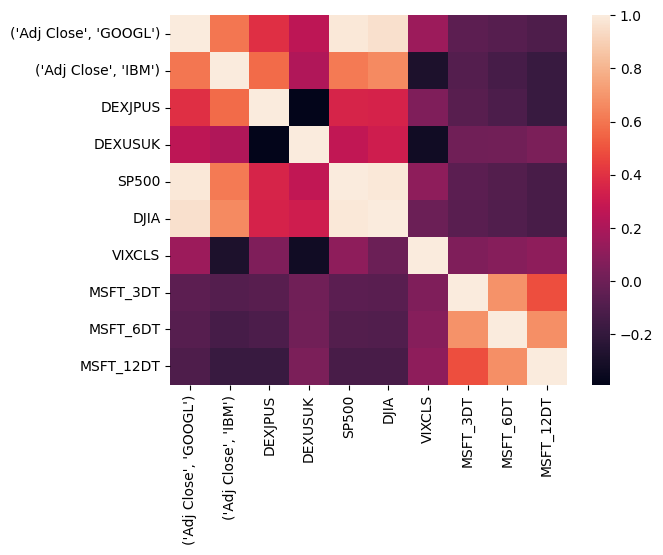

In [30]:
data_corr = X_dataset.corr()
sns.heatmap(data_corr)

In [31]:
lower = pd.DataFrame(np.tril(data_corr, -1),columns = X_dataset.columns)
lower

,"(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.602519,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.393718,0.570449,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.257608,0.213623,-0.391334,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.985398,0.609835,0.353037,0.269722,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5,0.960221,0.661889,0.345500,0.315700,0.986199,0.000000,0.000000,0.000000,0.000000,0.0
6,0.150032,-0.285172,0.059257,-0.327534,0.104659,-0.010828,0.000000,0.000000,0.000000,0.0
7,-0.055436,-0.086261,-0.075528,0.007444,-0.062447,-0.065364,0.058112,0.000000,0.000000,0.0
8,-0.077440,-0.133476,-0.112719,0.015099,-0.089644,-0.093858,0.080604,0.685784,0.000000,0.0
9,-0.107763,-0.181218,-0.182845,0.044647,-0.126586,-0.129120,0.104789,0.488869,0.676832,0.0


In [32]:
#remove ถ้า >0.9
to_drop = [column for column in lower if any(lower[column] > 0.9)]
X_dataset.drop(to_drop, inplace=True, axis=1)
X_dataset

,"(Adj Close, IBM)",DEXJPUS,DEXUSUK,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
0,-0.510341,-0.028635,0.589904,-1.525879,-1.185618,0.028453,0.013731,0.114044
1,-0.462352,0.039003,0.530386,-1.528735,-1.190225,0.130412,0.064801,0.174995
2,-0.524949,0.117046,0.494676,-1.515053,-1.224782,0.053122,0.146750,0.155840
3,-0.524949,0.104039,0.552493,-1.505230,-1.261642,-0.007724,0.147939,0.168030
4,-0.565287,0.101437,0.496376,-1.499434,-1.266250,-0.038970,0.108745,0.108819
...,...,...,...,...,...,...,...,...
1224,1.301784,3.495018,-2.481215,0.777726,0.657401,-1.281191,-0.667496,-1.850362
1225,1.197510,3.489815,-2.488018,0.709686,0.618237,-1.510456,0.272883,-1.731752
1226,1.309166,3.651104,-2.668271,0.745106,0.582529,-0.476137,0.684932,-1.824416
1227,1.136607,3.664112,-2.598551,0.663106,0.572162,0.358666,-0.619463,-1.746579


### Train/Test

In [33]:
#np.floor
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X_dataset,Y_dataset,test_size = 0.3,train_size=0.7, random_state=0)
# Test_size = int(np.floor(0.3 * len(X_dataset)))
# Train_size = int(np.floor(0.7 * len(X_dataset)))
# X_train, X_test = X_dataset[0:Train_size], X_dataset[Train_size:len(X_dataset)]
# Y_train, Y_test = Y_dataset[0:Train_size], Y_dataset[Train_size:len(X_dataset)]

In [34]:
X_test

,"(Adj Close, IBM)",DEXJPUS,DEXUSUK,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
18,0.616359,0.213299,0.117163,-1.275366,-1.213263,-0.101460,0.498303,0.314309
342,-0.440897,-0.130091,-0.416797,-0.738055,-0.558991,0.156806,0.457660,0.366760
467,-0.674579,-0.789556,-1.772103,-0.753546,0.183976,0.681432,0.361627,0.188227
1204,1.356223,2.661256,-1.517027,0.924583,0.394771,1.340980,1.703625,1.315228
858,-0.104149,-0.357717,1.285412,1.059791,-0.054465,-0.778727,0.240706,-0.073256
...,...,...,...,...,...,...,...,...
397,-0.228464,-0.130091,-0.029081,-0.520860,-0.583181,-0.519328,-0.522102,-0.161764
629,-1.381093,-0.411047,-1.217737,-1.249906,2.631735,1.394366,1.559340,0.646932
793,-0.355037,-1.001574,0.637518,0.396183,0.033079,-0.513286,-0.124963,0.713523
272,-1.608426,-0.027334,-0.483117,-0.945483,0.421264,-0.096971,-0.038540,-0.162875


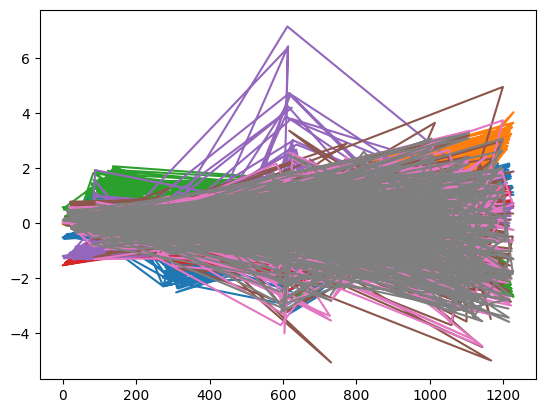

In [35]:
plt.plot(X_train)

### Model Traning

In [36]:
num_fold = 3
seed = 101
kfold = model_selection.KFold(n_splits=num_fold, shuffle = True, random_state=seed)
kfold

KFold(n_splits=3, random_state=101, shuffle=True)

In [37]:
Model_LM = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
#[0.1, 1, 10, 100]
c_val = 1
svr_lin = SVR(kernel='linear', C=c_val)
svr_rbf = SVR(kernel='rbf', C=c_val, gamma=0.01)
svr_poly = SVR(kernel='poly', C=c_val, degree=2)

### Model Training and Cross Validation

In [39]:
#Calculate accuracy score for each mode
score_LM = model_selection.cross_val_score(Model_LM, X_train, Y_train, cv=kfold)
score_lin = model_selection.cross_val_score(svr_lin, X_train, Y_train, cv=kfold)
score_rbf = model_selection.cross_val_score(svr_rbf, X_train, Y_train, cv=kfold)
score_poly = model_selection.cross_val_score(svr_poly, X_train, Y_train, cv=kfold)

c:\Python36\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will 

In [40]:
# View score k-fold
score = pd.DataFrame({'Linear Model':score_LM,'SVR_linear':score_lin, 'SVR_rbf': score_rbf, 'SVR_poly': 
score_poly})
score_mean = pd.DataFrame({'AVG Linear Model':[score_LM.mean()],'AVG SVR_linear':[score_lin.mean()], 
'AVG SVR_rbf': [score_rbf.mean()], 'AVG SVC_poly': [score_poly.mean()]})

   Linear Model  SVR_linear   SVR_rbf  SVR_poly
0      0.952171    0.951491  0.266055  0.351191
1      0.960496    0.953723  0.188543  0.265800
2      0.962244    0.957535  0.193839  0.287857
   AVG Linear Model  AVG SVR_linear  AVG SVR_rbf  AVG SVC_poly
0          0.958304         0.95425     0.216146      0.301616


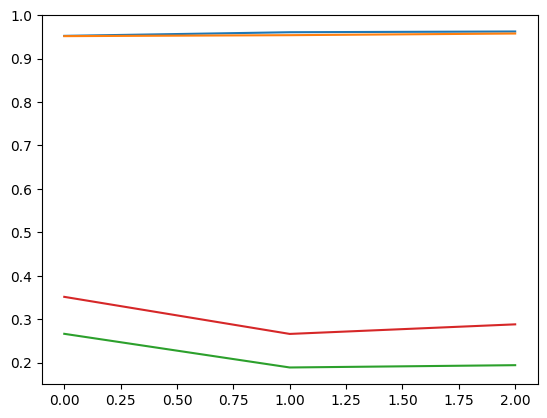

In [41]:
print(score)
print(score_mean)
plt.plot(score)

### Prediction

In [42]:
#Predict all models ( LM, SVR_linear, SVR_rbf, SVR Poly 
LM_pred = Model_LM.fit(X_train, Y_train).predict(X_test)
SVR_linear = svr_lin.fit(X_train, Y_train).predict(X_test)
SVR_rbf = svr_rbf.fit(X_train, Y_train).predict(X_test)
SVR_poly = svr_poly.fit(X_train, Y_train).predict(X_test)

c:\Python36\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all string

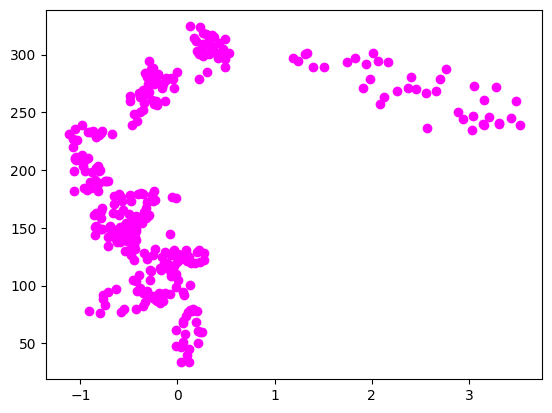

In [43]:
plt.scatter(X_test['DEXJPUS'], LM_pred,c='magenta')

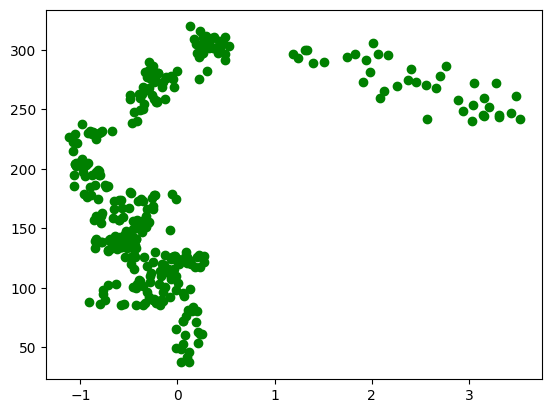

In [44]:
plt.scatter(X_test['DEXJPUS'], SVR_linear,c='green')

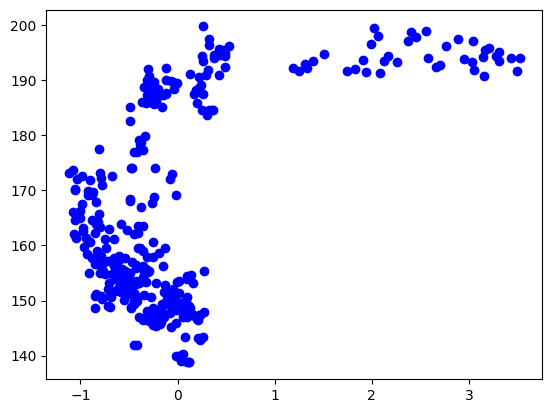

In [45]:
plt.scatter(X_test['DEXJPUS'], SVR_rbf,c='blue')

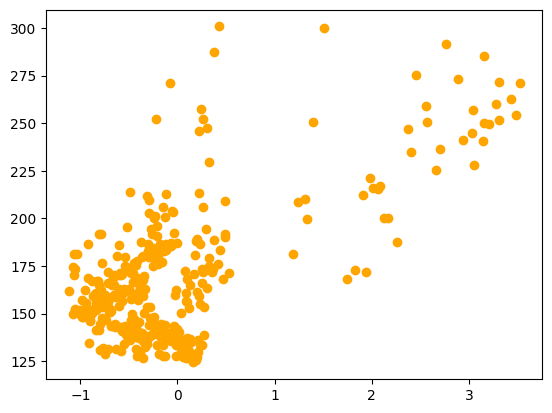

In [46]:
plt.scatter(X_test['DEXJPUS'], SVR_poly,c='orange')

In [47]:
#Model prediction performance evaluation for all model ( LM, SVR_linear, SVR_rbf, SVR Poly )
#MSE LM_prd
LM_MSE = metrics.mean_squared_error(Y_test, LM_pred)
#MSE SVR_Linear
SVR_Linear_MSE = metrics.mean_squared_error(Y_test,SVR_linear)
#MSE SVR_rbf
SVR_RBF_MSE = metrics.mean_squared_error(Y_test,SVR_rbf)
#MSE SVR_Poly
SVR_Poly_MSE = metrics.mean_squared_error(Y_test,SVR_poly)

In [48]:
#R2 LM_prd
LM_R2 = metrics.r2_score(Y_test, LM_pred)
#R2 SVR_Linear
SVR_Linear_R2 = metrics.r2_score(Y_test,SVR_linear)
#R2 SVR_rbf
SVR_RBF_R2 = metrics.r2_score(Y_test,SVR_rbf)
#R2 SVR_Poly
SVR_Poly_R2 = metrics.r2_score(Y_test,SVR_poly)

In [49]:
mse = {LM_MSE,SVR_Linear_MSE,SVR_RBF_MSE,SVR_Poly_MSE}
r2 = {LM_R2,SVR_Linear_R2,SVR_RBF_R2,SVR_Poly_R2}
print("mse =",mse)
print("r2 =",r2)

mse = {4291.443829805962, 275.84406020260496, 3886.659089635322, 294.5594884265951}
r2 = {0.9552714754195792, 0.9522367409006087, 0.36977244861179226, 0.30413600102179006}


<BarContainer object of 4 artists>

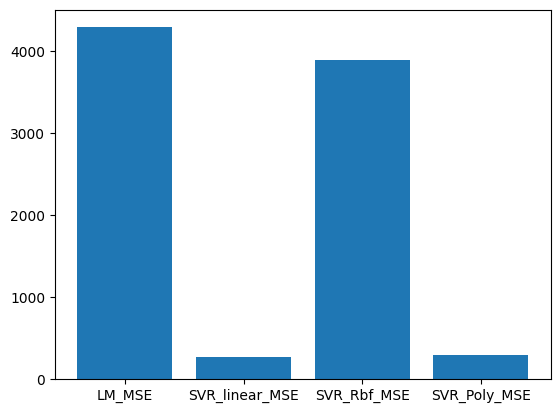

In [50]:
plt.bar(["LM_MSE","SVR_linear_MSE","SVR_Rbf_MSE","SVR_Poly_MSE"],mse)

<BarContainer object of 4 artists>

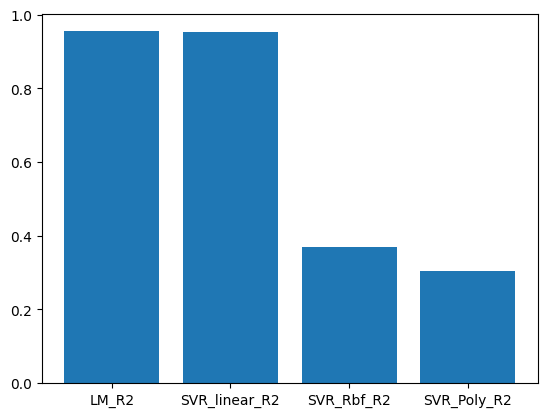

In [51]:
plt.bar(["LM_R2","SVR_linear_R2","SVR_Rbf_R2","SVR_Poly_R2"],r2)